# Number of International Visitors to London

### Data Source :  https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv 



 The Data is as follows: 
- year     - In year which they have arrived
- quarter  - quarter of the year
- market   - which country they belong to
- dur_stay - Duration of the stay
- mode     - Mode of transport
- Purpose  - Purpose of the visit
- area     - To which area they flew of
- visits   - of visits
- spend    - Spent money 
- nights   - of nights over the course of 
- sample   

## Installling Libraries

In [1]:
!pip install missingno
!pip install seaborn

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import lag_plot


### Reading CSV file to visitors_data

In [3]:
#Reading csv file using pandas

visitors_data = pd.read_csv("https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv",engine='python',encoding= 'unicode_escape')

In [4]:
visitors_data.head()

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


### Changing the column names of Visists(000s), Spend(m), Nights(000s)

In [5]:
#Column names changed using rename

visitors_data = visitors_data.rename({'Visits (000s)': 'visits', 'Spend (£m)': 'spend', 'Nights (000s)': 'nights'}, axis=1)  # new method

In [6]:
visitors_data.head(4)

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1


In [7]:
#Shape of the dataframe

visitors_data.shape

(61462, 11)

In [8]:
#The info we have in the dataframe

visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      61462 non-null  object 
 1   quarter   61462 non-null  object 
 2   market    61462 non-null  object 
 3   dur_stay  61462 non-null  object 
 4   mode      61462 non-null  object 
 5   purpose   61462 non-null  object 
 6   area      61462 non-null  object 
 7   visits    61462 non-null  float64
 8   spend     61462 non-null  float64
 9   nights    61462 non-null  float64
 10  sample    61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB


In [9]:
#Printing the coulumns of the dataframe

for col in visitors_data.columns:
    print(col)

year
quarter
market
dur_stay
mode
purpose
area
visits
spend
nights
sample


In [10]:
#Describing the data we have in the dataframe

visitors_data.describe()

,visits,spend,nights,sample
count,61462.000000,61462.000000,61462.000000,61462.000000
mean,4.927651,3.086634,30.300852,6.099021
std,10.061362,7.243874,61.898302,13.335820
min,0.000103,0.000000,0.000309,1.000000
25%,0.822888,0.321693,3.901581,1.000000
50%,1.797305,1.047351,10.676935,2.000000
75%,4.416618,3.007542,29.483044,5.000000
max,187.487282,373.232590,2492.178513,299.000000


In [11]:
#Dropping the column that which has all unique values

visitors_data.drop(columns = "area")

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,1.648670,0.016789,1.650300,1
...,...,...,...,...,...,...,...,...,...,...
61457,2020P,January-March,Other Africa,4-7 nights,Air,Miscellaneous,1.695331,1.103167,8.831038,2
61458,2020P,January-March,Other Africa,8-14 nights,Air,Holiday,1.486972,2.022254,7.836555,1
61459,2020P,January-March,Other Africa,8-14 nights,Air,VFR,2.416554,1.847152,63.894432,2
61460,2020P,January-March,Other Africa,15+ nights,Air,Holiday,2.472653,1.006109,35.080377,2


In [12]:
#The datatypes of the data rom each column

visitors_data.dtypes                                                  

year         object
quarter      object
market       object
dur_stay     object
mode         object
purpose      object
area         object
visits      float64
spend       float64
nights      float64
sample        int64
dtype: object

## Checking the null values
### Shows there are no null values in each column in the dataframe

In [13]:
#Checking the null values using isna()

visitors_data.isna().sum()

year        0
quarter     0
market      0
dur_stay    0
mode        0
purpose     0
area        0
visits      0
spend       0
nights      0
sample      0
dtype: int64

### Visualising the null values using "msno" in a bar plot, where as it shows there are no null values in the dataframe

<AxesSubplot:>

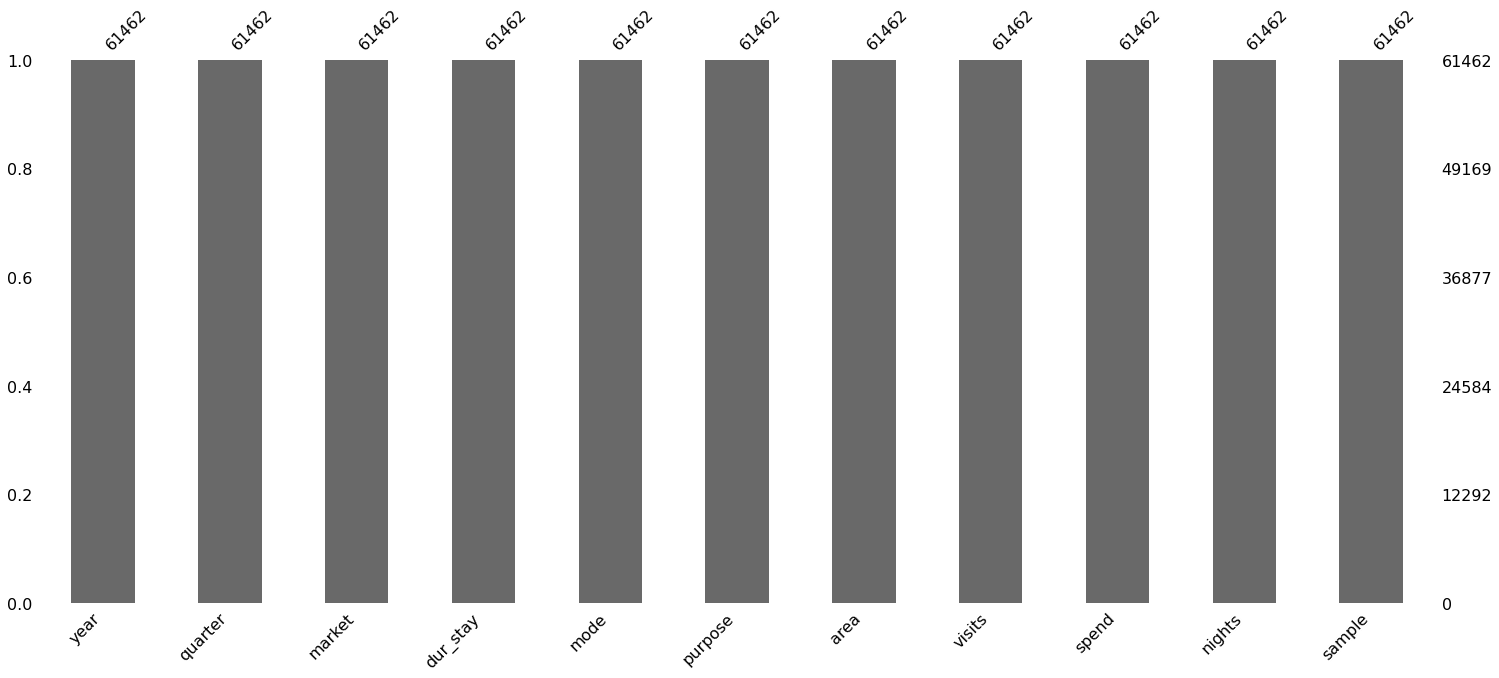

In [14]:
#Visualising msno barplot

msno.bar(visitors_data)

### Visualising null values of the dataframe using "heatmap"

<AxesSubplot:>

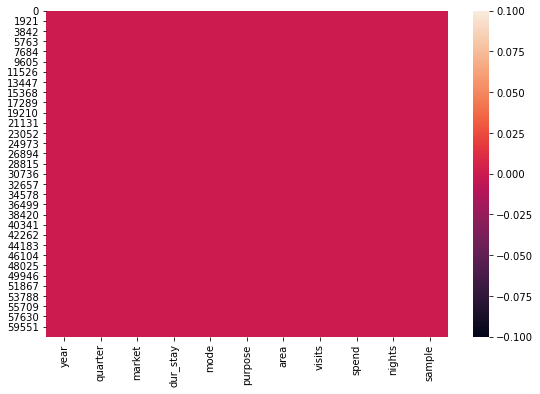

In [15]:
#Visualising using heat map

plt.figure(figsize=(9,6))
sns.heatmap(visitors_data.isna())

# Visualising the data 

## Visualising the dataframe using scatterplot where it shows the data in points for the columns where we have numericals

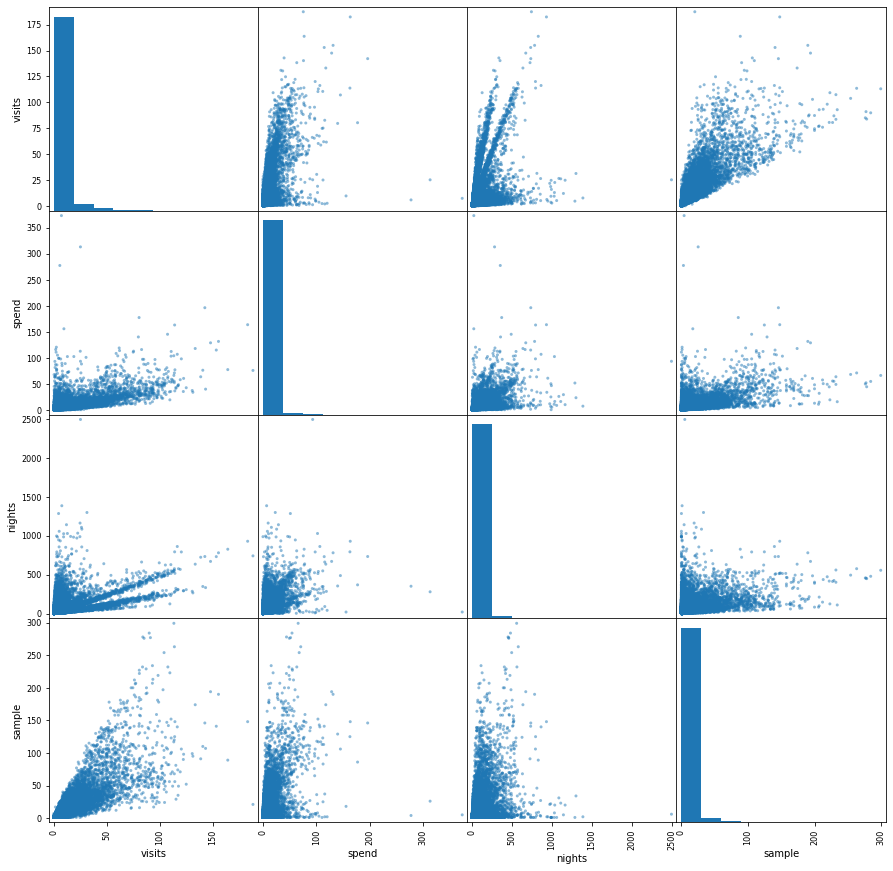

In [16]:
pd.plotting.scatter_matrix(visitors_data,figsize=(15,15))
plt.show()

## Visualising the dataframe using pairplot where it shows the data in points for the columns where we have numericals

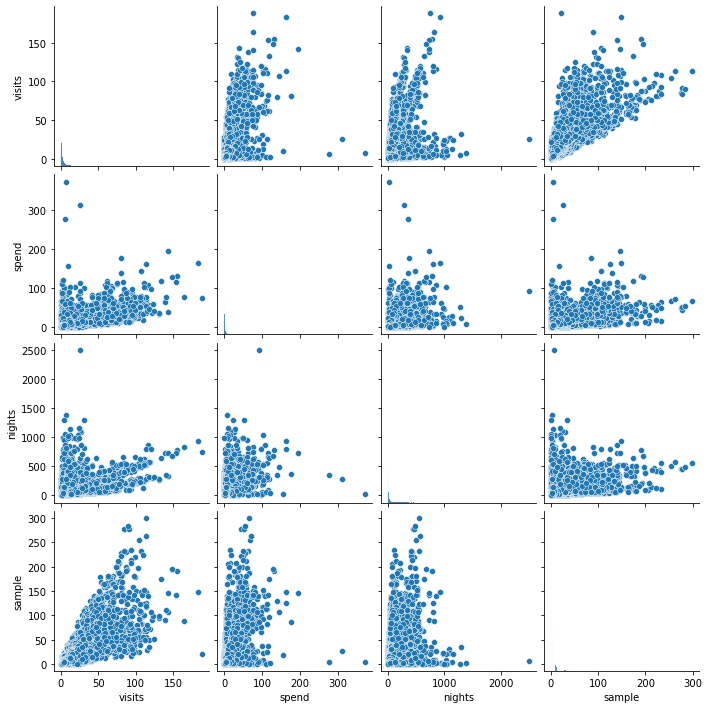

In [17]:
sns.pairplot(visitors_data)                                              

## Corelation
### Corelating the numerical values of the columns

In [18]:
corelation=visitors_data.corr()  
corelation

,visits,spend,nights,sample
visits,1.000000,0.681430,0.570558,0.830621
spend,0.681430,1.000000,0.598601,0.614725
nights,0.570558,0.598601,1.000000,0.481264
sample,0.830621,0.614725,0.481264,1.000000


### Visualising corelation using heatmap

<AxesSubplot:>

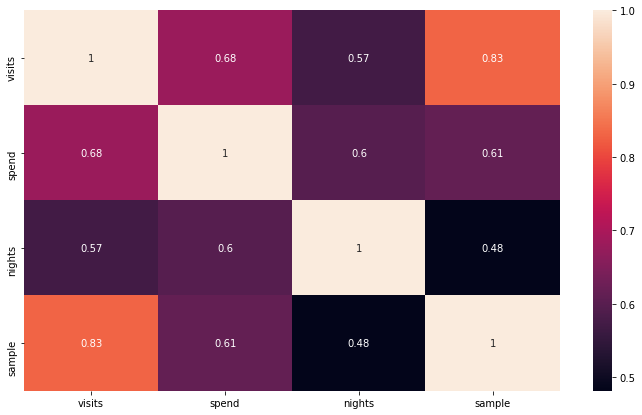

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

## Visualising the data using histogram that the number of entries in each quarter

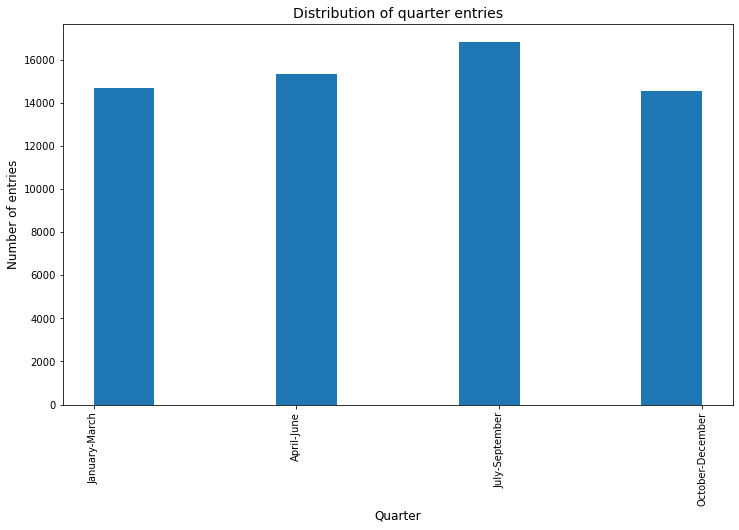

In [20]:
plt.figure(figsize=(12,7))
plt.hist(visitors_data['quarter'])
plt.xticks(rotation=90)
plt.xlabel("Quarter",fontsize=12)
plt.ylabel("Number of entries",fontsize=12)
plt.title("Distribution of quarter entries",fontsize=14)
plt.show()

## Visualising the records of number of visits per quarter using plot

In [21]:
visits_per_quarter = visitors_data.groupby('quarter').visits.sum()
print(visits_per_quarter)

quarter
April-June          77859.028403
January-March       66804.174806
July-September      84283.611546
October-December    73916.455313
Name: visits, dtype: float64


<AxesSubplot:title={'center':'Number of visits per quarter'}, xlabel='quarter', ylabel='Vistors Per Quarter'>

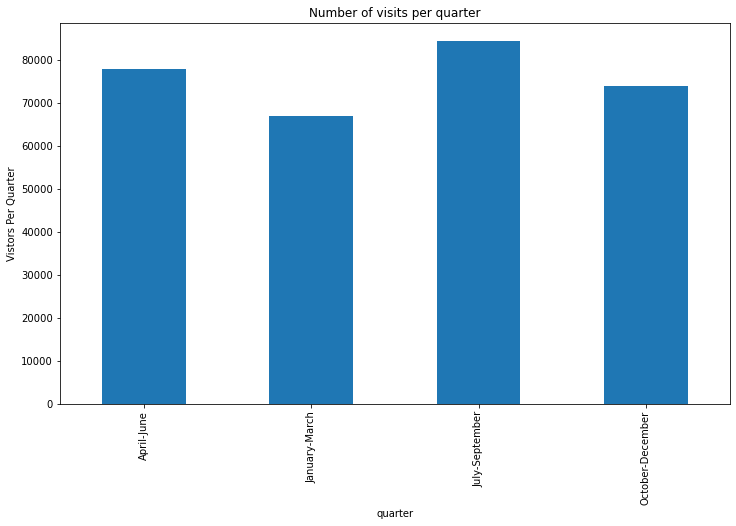

In [22]:
plt.figure(figsize=(12,7))
visits_per_quarter.plot(kind = 'bar', title = 'Number of visits per quarter',ylabel = 'Vistors Per Quarter')

<AxesSubplot:ylabel='visits'>

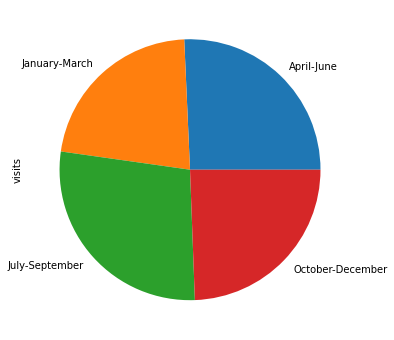

In [23]:
fig = plt.gcf()
fig.set_size_inches(6,6)
visits_per_quarter.plot.pie()

## Visualising of nights spent byt he visitors per quarter

In [24]:
nights_per_quarter = visitors_data.groupby('quarter').nights.sum()
print(nights_per_quarter)

quarter
April-June          448972.695039
January-March       386040.877997
July-September      595013.133039
October-December    432324.266327
Name: nights, dtype: float64


<AxesSubplot:title={'center':'Number of nights per quarter'}, xlabel='quarter', ylabel='Nights Per Quarter'>

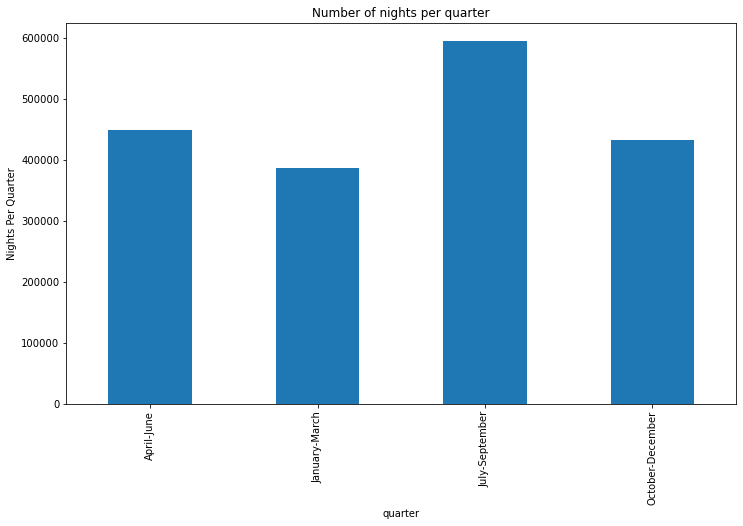

In [25]:
plt.figure(figsize=(12,7))
nights_per_quarter.plot(kind = 'bar', title = 'Number of nights per quarter',ylabel = 'Nights Per Quarter')

<AxesSubplot:ylabel='nights'>

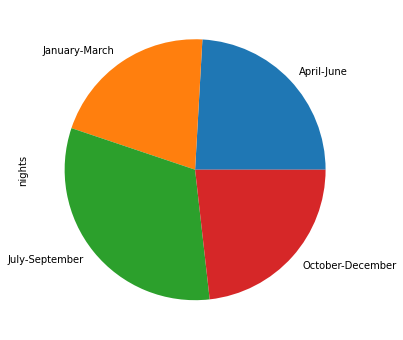

In [26]:
fig = plt.gcf()
fig.set_size_inches(6,6)
nights_per_quarter.plot.pie()

## Visualising the data that how much amount spent by the visitors per quarter

In [27]:
Revenue_per_quarter = visitors_data.groupby('quarter').spend.sum()
print(Revenue_per_quarter)

quarter
April-June          46929.584550
January-March       39447.043648
July-September      55654.995775
October-December    47679.100819
Name: spend, dtype: float64


<AxesSubplot:title={'center':'Revenue per quarter'}, xlabel='quarter', ylabel='Revenue Per Quarter'>

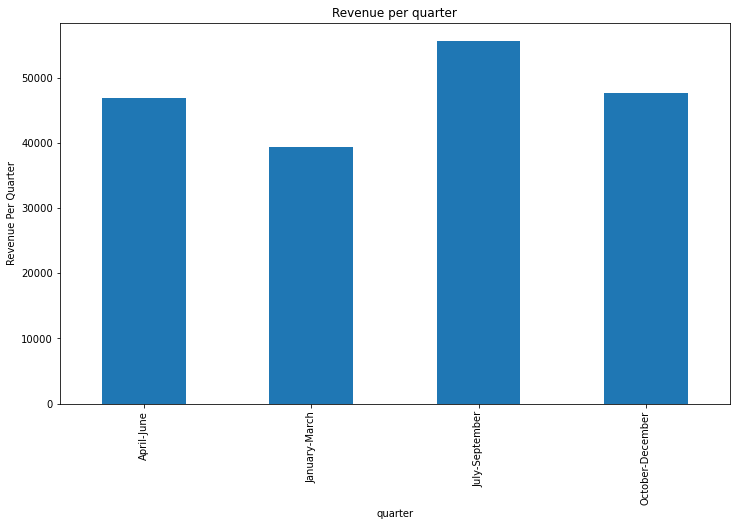

In [28]:
plt.figure(figsize=(12,7))
Revenue_per_quarter.plot(kind = 'bar', title = 'Revenue per quarter',ylabel = 'Revenue Per Quarter')

<AxesSubplot:ylabel='spend'>

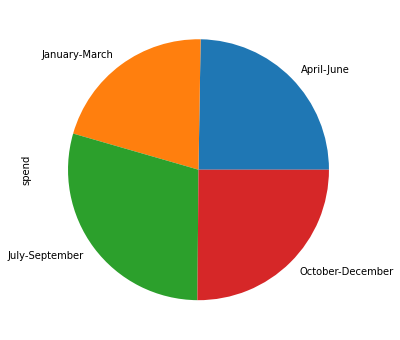

In [29]:
fig = plt.gcf()
fig.set_size_inches(6,6)
Revenue_per_quarter.plot.pie()

## Visualising the records of the mode of transport of the visitors

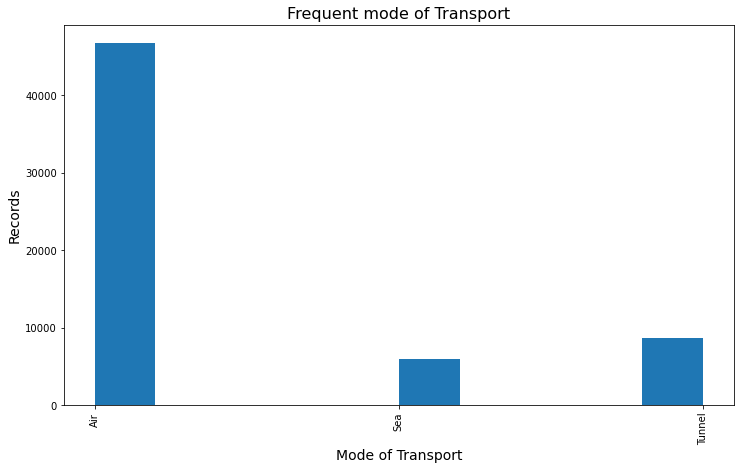

In [30]:
plt.figure(figsize=(12,7))
plt.hist(visitors_data['mode'])
plt.xticks(rotation=90)
plt.xlabel("Mode of Transport",fontsize=14)
plt.ylabel("Records",fontsize=14)
plt.title("Frequent mode of Transport",fontsize=16)
plt.show()

## Visualising the data of the purpose of visit of the visitors

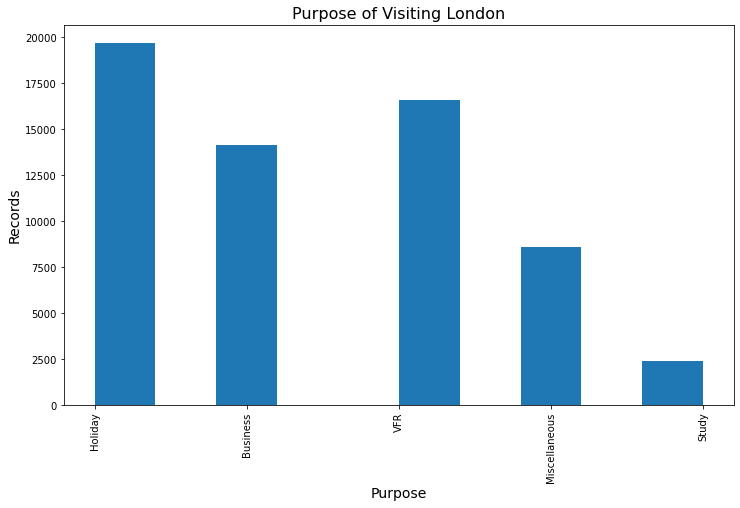

In [31]:
plt.figure(figsize=(12,7))
plt.hist(visitors_data['purpose'])
plt.xticks(rotation=90)
plt.xlabel("Purpose",fontsize=14)
plt.ylabel("Records",fontsize=14)
plt.title("Purpose of Visiting London",fontsize=16)
plt.show()

#### Visualising that revenue of the amount of people who came on holiday spend

In [32]:
spent_purpose = visitors_data.groupby('purpose').spend.sum()
print(spent_purpose)

purpose
Business         50169.127178
Holiday          85579.245305
Miscellaneous    13698.417481
Study             8249.132433
VFR              32014.802394
Name: spend, dtype: float64


<AxesSubplot:title={'center':'Spending'}, xlabel='purpose', ylabel='Spending per purpose'>

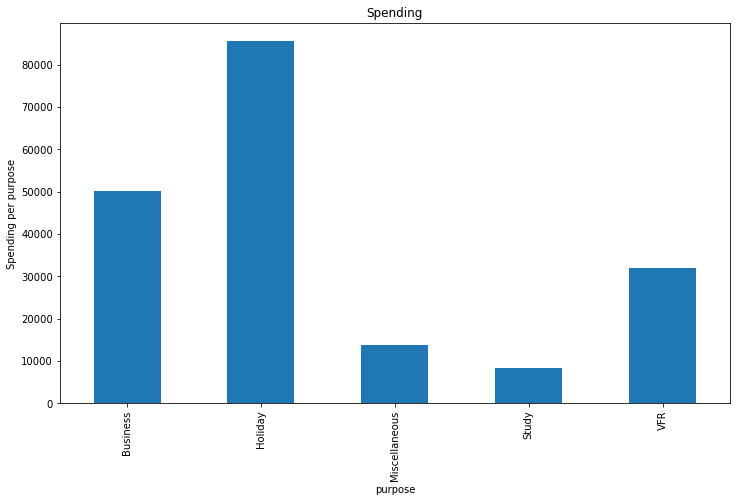

In [33]:
spent_purpose.plot(figsize=(12,7), kind='bar')
spent_purpose.plot(kind = 'bar', title = 'Spending',ylabel = 'Spending per purpose')

<AxesSubplot:ylabel='spend'>

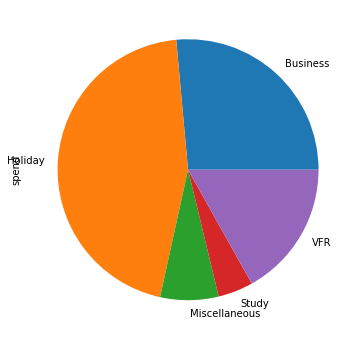

In [34]:
fig = plt.gcf()
fig.set_size_inches(6,6)
spent_purpose.plot.pie()

## Visulaising that poeple who spent lot of money

In [35]:
Market_Spent = visitors_data.groupby('market').spend.sum()
print(Market_Spent)

market
Argentina                 816.729290
Australia                7278.042464
Austria                  1306.276898
Bahrain                   516.414819
Belgium                  2527.332994
                            ...     
Taiwan                    977.649368
Thailand                 1089.274155
Turkey                   1848.468932
USA                     31274.394670
United Arab Emirates     4922.583661
Name: spend, Length: 62, dtype: float64


<AxesSubplot:title={'center':'Spending money for each country'}, xlabel='market', ylabel='Spending per country'>

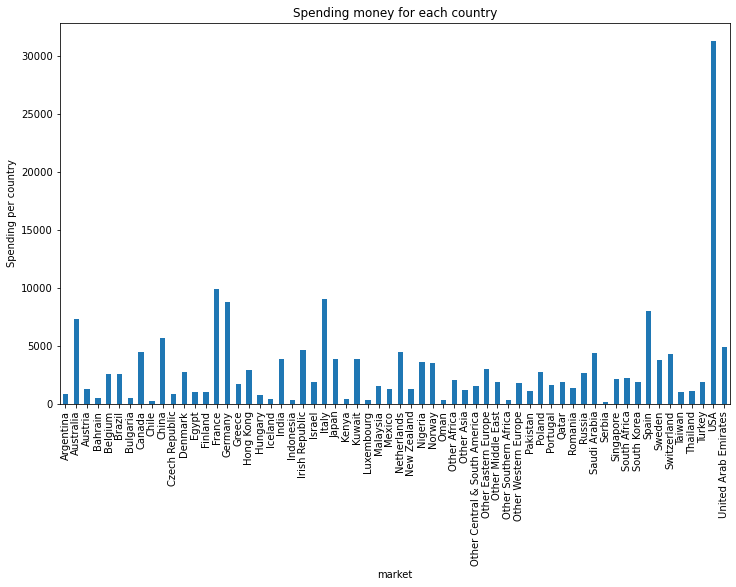

In [36]:
Market_Spent.plot(figsize=(12,7),kind='bar')
Market_Spent.plot(kind = 'bar', title = 'Spending money for each country',ylabel = 'Spending per country')

# Hypothesis-1 

### More number of holidays are expected during the second quarter as this is the period of summer break. However, based on the visualisationwe see there are more number of travellers in the third quarter for holiday purpose. Therefore my hypothesis is false.

Text(0, 0.5, 'Instances of the purpose Served')

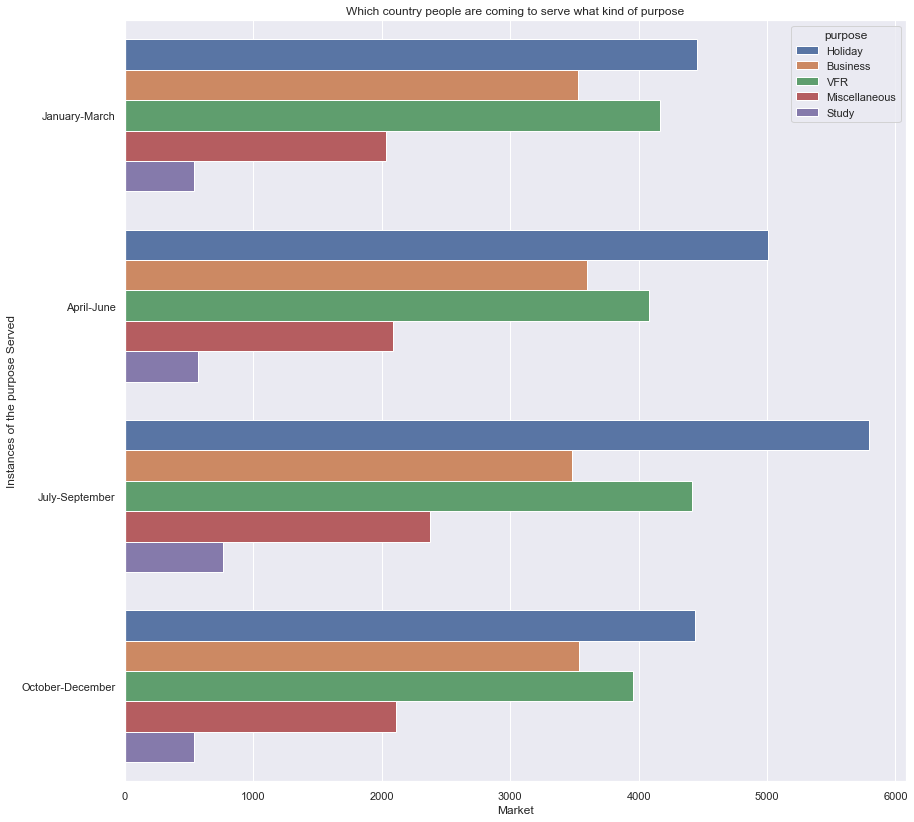

In [37]:
sns.set(rc={'figure.figsize':(14,14)})
plot = sns.countplot(y= "quarter", hue = "purpose", data = visitors_data)
plot.set_title('Which country people are coming to serve what kind of purpose')
plot.set_xlabel('Market')
plot.set_ylabel('Instances of the purpose Served')

#Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Hypothesis-2

### It is expected that more people visit london from near by european countries for holidays, as it is easier and more convinient. However, USA being the economic super power accounts for more number of holidays taken to london than any of the european countries as seen in the visualisation. 

Text(0, 0.5, 'Market')

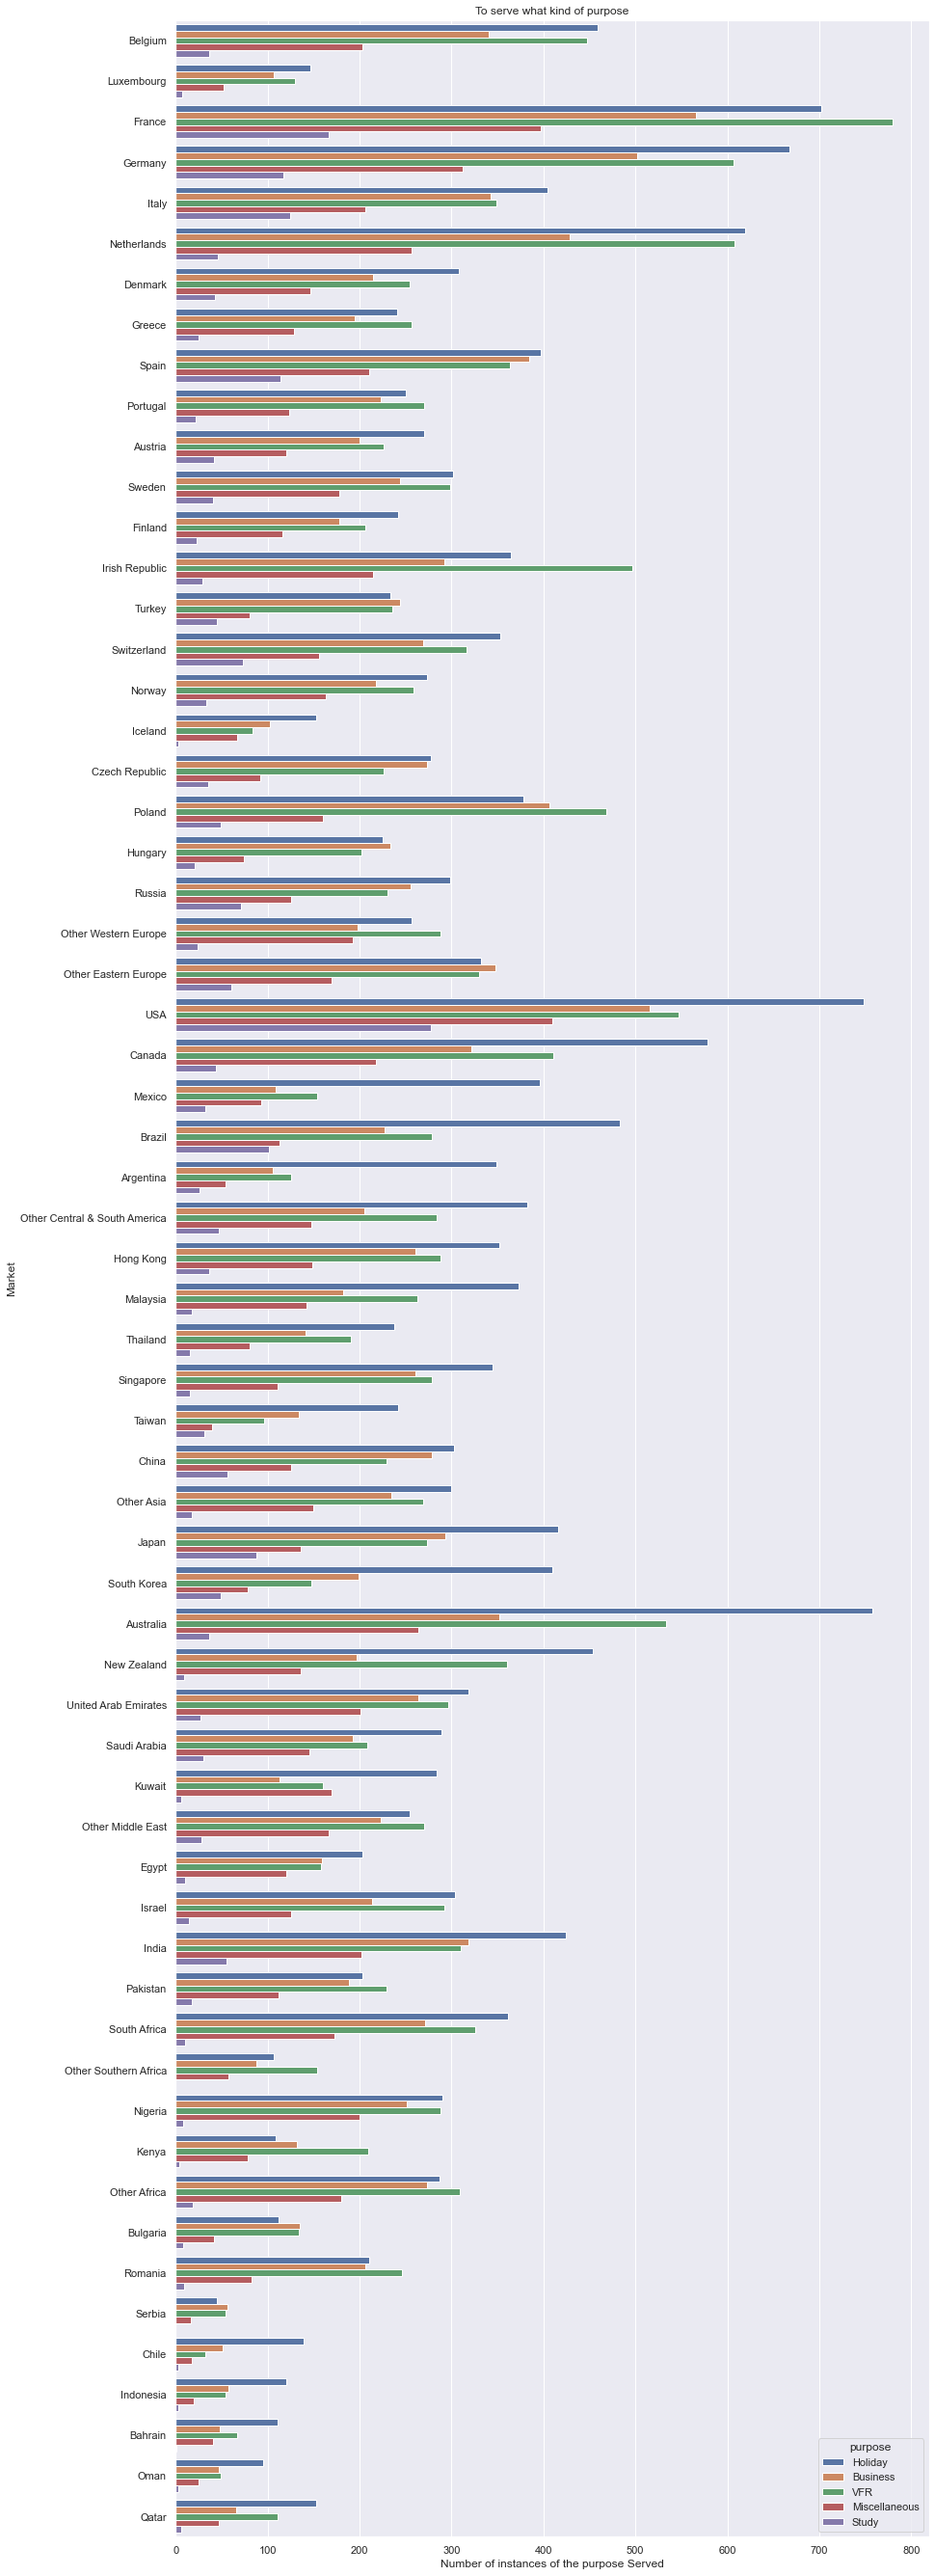

In [38]:
sns.set(rc={'figure.figsize':(14,48)})
plot = sns.countplot(y= "market", hue = "purpose", data = visitors_data)
plot.set_title('To serve what kind of purpose')
plot.set_xlabel('Number of instances of the purpose Served')
plot.set_ylabel('Market')